In [50]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import seaborn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [51]:
data = pd.read_csv(r"D:\Data Science\datasets\yahoo_data.csv")
data['Date']=pd.to_datetime(data['Date'])
data['Date_val'] = data['Date'].map(dt.datetime.toordinal)
data.drop('Unnamed: 0',inplace=True,axis=1)
# #print(data.Volume)
# for col in data.columns[1:]:
#     for value in data[col]:
#         data[col] = data[col].replace(value,value.replace(',',''))
#     data[[col]] = data[[col]].astype(float)
data.dtypes
# data.to_csv("D:\Data Science\datasets\yahoo_data.csv")
#print(data.isnull().sum())
#data.info()
#print(data.dtypes)

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
Volume                float64
Date_val                int64
dtype: object

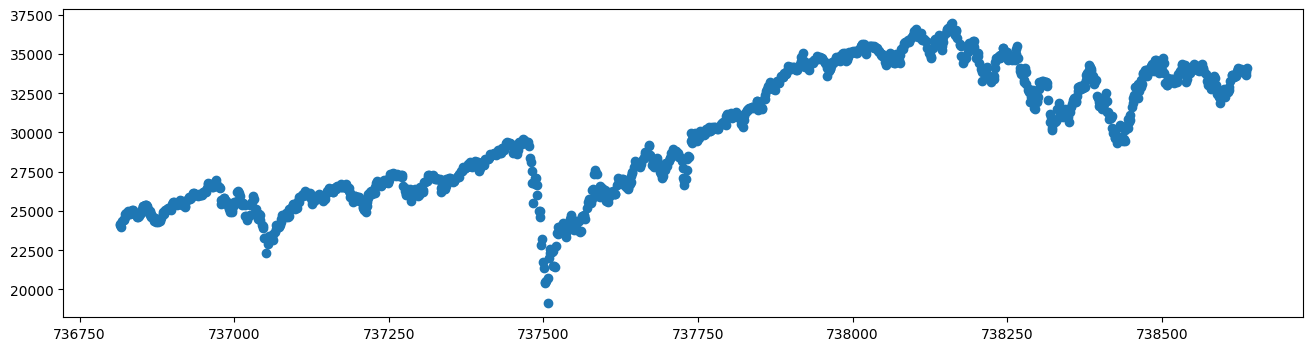

In [52]:
#sns.heatmap(data.corr(),annot=True)
plt.figure(figsize=(16,4))
plt.scatter(data['Date_val'],data['High'])
#plt.scatter(data['Low'],data['High'])
plt.show()

In [53]:
ss = MinMaxScaler()
scaled_data = pd.DataFrame(ss.fit_transform(data.drop('Date',axis=1)),columns = ['Open','High','Low','Close*','Adj Close**','Volume','Date_val'])
scaled_data

Open      High       Low    Close*  Adj Close**    Volume  Date_val
0     0.834682  0.840279  0.842170  0.851629     0.851629  0.323147  1.000000
1     0.811185  0.826550  0.822968  0.836691     0.836691  0.309807  0.999451
2     0.823318  0.814553  0.815433  0.807896     0.807896  0.283211  0.998903
3     0.836429  0.827433  0.831150  0.820471     0.820471  0.255146  0.998354
4     0.835112  0.828311  0.842045  0.839395     0.839395  0.199882  0.997806
...        ...       ...       ...       ...          ...       ...       ...
1253  0.298928  0.300502  0.328393  0.316645     0.316645  0.266943  0.003291
1254  0.273358  0.292309  0.302091  0.311438     0.311438  0.293225  0.001646
1255  0.271719  0.273398  0.288653  0.293184     0.293184  0.365239  0.001097
1256  0.286493  0.284018  0.307922  0.292900     0.292900  0.360551  0.000549
1257  0.287604  0.280192  0.303682  0.302461     0.302461  0.354189  0.000000

[1258 rows x 7 columns]

In [54]:
X_train,X_test,y_train,y_test = train_test_split(scaled_data[['Date_val']],scaled_data[['Open']],test_size=0.3)
print('Before polyfit',X_test)
print(y_test)
n=3
poly_func = PolynomialFeatures(degree=n)
X_train = pd.DataFrame(poly_func.fit_transform(X_train.values.reshape(-1,1)))
X_test = pd.DataFrame(poly_func.fit_transform(X_test.values.reshape(-1,1)))
y_train = pd.DataFrame(poly_func.fit_transform(y_train.values.reshape(-1,1)))
y_test = pd.DataFrame(poly_func.fit_transform(y_test.values.reshape(-1,1)))

lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print("Train Accuracy",lr.score(X_train,y_train))
print("Test Accuracy",lr.score(X_test,y_test))
#print(y_test)


Before polyfit      Date_val
720  0.427318
263  0.790455
158  0.874931
570  0.546901
496  0.606144
..        ...
647  0.484915
175  0.860669
855  0.319254
441  0.649479
717  0.430060

[378 rows x 1 columns]
         Open
720  0.394936
263  0.881751
158  0.742113
570  0.684584
496  0.890511
..        ...
647  0.503682
175  0.847801
855  0.486388
441  0.908860
717  0.403014

[378 rows x 1 columns]
Train Accuracy 0.8200787087635732
Test Accuracy 0.8129406352769488


In [55]:
# trn_acc =[]
# n =[]
# tst_acc = []

# for i in range(20):
#     X_train,X_test,y_train,y_test = train_test_split(scaled_data[['Date_val']],scaled_data[['Open']],test_size=0.3)
#     #print(y_test)
#     #n=2
#     poly_func = PolynomialFeatures(degree=i)
#     X_train = pd.DataFrame(poly_func.fit_transform(X_train.values.reshape(-1,1)))
#     X_test = pd.DataFrame(poly_func.fit_transform(X_test.values.reshape(-1,1)))
#     y_train = pd.DataFrame(poly_func.fit_transform(y_train.values.reshape(-1,1)))
#     y_test = pd.DataFrame(poly_func.fit_transform(y_test.values.reshape(-1,1)))

#     lr=LinearRegression()
#     lr.fit(X_train,y_train)
#     pred=lr.predict(X_test)
#     #print("Train Accuracy",lr.score(X_train,y_train))
#     #print("Test Accuracy",lr.score(X_test,y_test))
#     n.append(i)
#     trn_acc.append(lr.score(X_train,y_train))
#     tst_acc.append(lr.score(X_test,y_test))
#     #print(y_test)

# print(n,trn_acc)
# plt.figure(figsize=(16,4))
# plt.plot(n,tst_acc)

arr = np.empty(len(X_test))


pow = poly_func.powers_.reshape(1,-1)
coef=lr.coef_
#print(X_test.shape,pow.shape)
for i in range(X_test.shape[1]):
    tmp = 0
    for j in range(len(pow)):
        tmp += (X_test[i][j]**pow[0][j])
    arr[i] = tmp

#print(arr.shape)

print(X_test[0])
print(arr[0])
print("coef",coef)


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
373    1.0
374    1.0
375    1.0
376    1.0
377    1.0
Name: 0, Length: 378, dtype: float64
1.0
coef [[ 0.          0.          0.          0.        ]
 [ 0.         -1.1096974   4.81972739 -3.41873921]
 [ 0.         -1.75696599  6.77723675 -4.74255593]
 [ 0.         -2.06475496  7.40612485 -5.14472842]]


In [56]:
plt.figure(figsize=(16,4))
X_test = np.sum(X_test*poly_func.powers_.reshape(1,-1),axis=1)
y_test = np.sum(y_test*poly_func.powers_.reshape(1,-1),axis=1)
pred = np.sum(pred*poly_func.powers_.reshape(1,-1),axis=1)
plt.scatter(X_test,y_test)
plt.scatter(X_test,pred)
plt.show()

In [57]:
# a=scaled_data['Open'][:5]
# p=PolynomialFeatures(degree=3)
# c=p.fit_transform(a.values.reshape(-1,1))
# p.powers_

# for i in range(len(a)):
#     print(c[i])
a=np.array([[1,2,3,4,5],
           [6,7,8,9,10]]).reshape(-1,2)
print(a)
b=np.array([1,4,9,16,25])

m=LinearRegression()
m.fit(a,b)
m.coef_,m.intercept_
c=(m.coef_*a)+m.intercept_
c

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


array([[-4. , -2.5],
       [-1. ,  0.5],
       [ 2. ,  3.5],
       [ 5. ,  6.5],
       [ 8. ,  9.5]])